In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

### Importing Data

In [2]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Checking Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<AxesSubplot:>

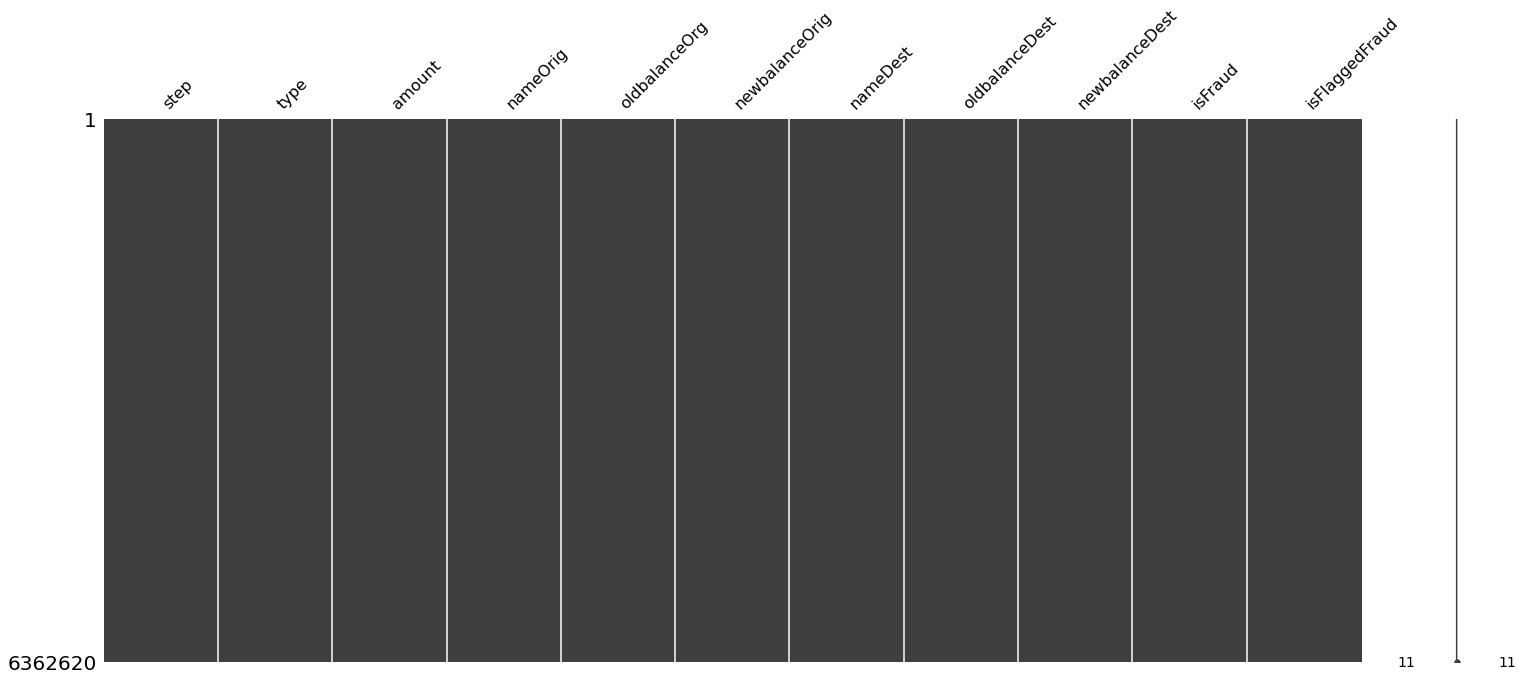

In [4]:
msno.matrix(df)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Checking the number of Merchant Transactions

In [6]:
print(len(df[df['nameOrig'].str.startswith('M')]),'\n',len(df[df['nameDest'].str.startswith('M')]))

0 
 2151495


In [7]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [8]:
df["isFraud"].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

#### Data is very unbalanced. Proceeding with rest of the steps

###  Data Exploration

In [9]:
#Removing Numbers from Original Name and Destination Name
df['nameOrig'] = df['nameOrig'].str.replace('\d+', '')
df['nameDest'] = df['nameDest'].str.replace('\d+', '')
df.head()

C:\Users\doome\AppData\Local\Temp\ipykernel_12304\56095245.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['nameOrig'] = df['nameOrig'].str.replace('\d+', '')
C:\Users\doome\AppData\Local\Temp\ipykernel_12304\56095245.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['nameDest'] = df['nameDest'].str.replace('\d+', '')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


In [10]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

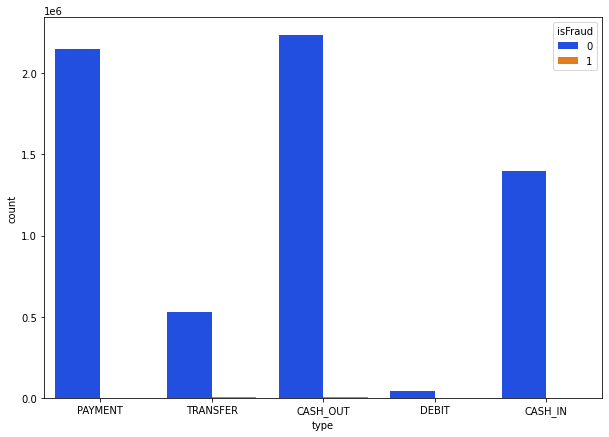

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'type', data = df, hue = 'isFraud', palette = 'bright')

#### H - Most of the Fraudulent transactions are of the type 'TRANSFER' and 'CASH OUT'

<AxesSubplot:xlabel='nameDest', ylabel='count'>

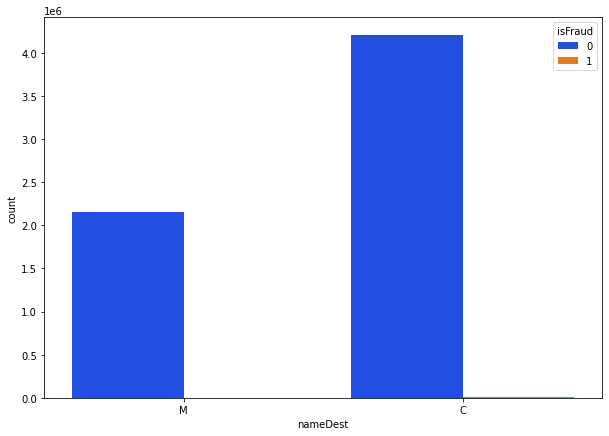

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'nameDest', data = df, hue = 'isFraud', palette = 'bright')

#### H - Most of the fraudulent transactions are done from Customer to Customer. No involvement of Merchants found

<AxesSubplot:xlabel='nameDest', ylabel='count'>

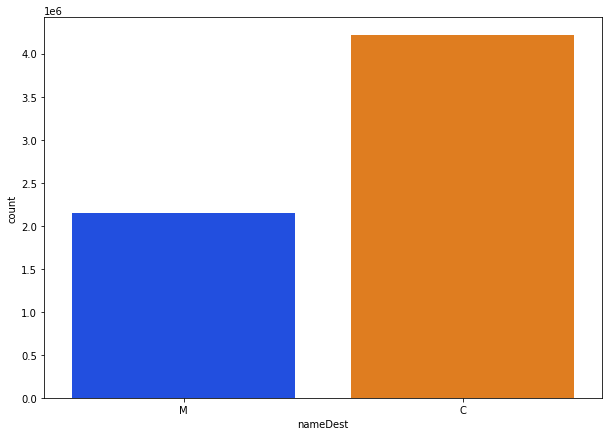

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'nameDest', data = df, palette = 'bright')

<AxesSubplot:>

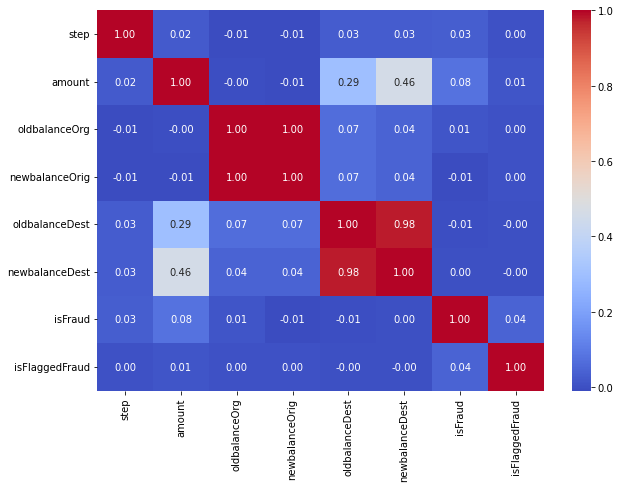

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), fmt = '.2f',annot = True, cmap ='coolwarm')

### Feature Engineering

In [15]:
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0
1,1,3,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0
2,1,4,181.00,C,181.0,0.00,C,0.0,0.0,1,0
3,1,1,181.00,C,181.0,0.00,C,21182.0,0.0,1,0
4,1,3,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0


In [16]:
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,0,170136.0,160296.36,1,0.0,0.0,0,0
1,1,3,1864.28,0,21249.0,19384.72,1,0.0,0.0,0,0
2,1,4,181.00,0,181.0,0.00,0,0.0,0.0,1,0
3,1,1,181.00,0,181.0,0.00,0,21182.0,0.0,1,0
4,1,3,11668.14,0,41554.0,29885.86,1,0.0,0.0,0,0


In [17]:
data = df.copy()
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,0,170136.0,160296.36,1,0.0,0.0,0,0
1,1,3,1864.28,0,21249.0,19384.72,1,0.0,0.0,0,0
2,1,4,181.00,0,181.0,0.00,0,0.0,0.0,1,0
3,1,1,181.00,0,181.0,0.00,0,21182.0,0.0,1,0
4,1,3,11668.14,0,41554.0,29885.86,1,0.0,0.0,0,0


In [18]:
data.drop(["isFlaggedFraud"], axis=1, inplace=True)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,0,170136.0,160296.36,1,0.0,0.0,0
1,1,3,1864.28,0,21249.0,19384.72,1,0.0,0.0,0
2,1,4,181.00,0,181.0,0.00,0,0.0,0.0,1
3,1,1,181.00,0,181.0,0.00,0,21182.0,0.0,1
4,1,3,11668.14,0,41554.0,29885.86,1,0.0,0.0,0


### Train and Test Splitting

In [19]:
x = data.drop('isFraud',axis = 1).values
y = data['isFraud'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)
print(x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6362620, 9) (6362620,) (5090096, 9) (5090096,) (1272524, 9) (1272524,)


### Model Building and Validation

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(logreg_pred,y_test)*100
acc_logreg

99.92102310054663

In [23]:
print(classification_report(logreg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271762
           1       0.43      0.92      0.58       762

    accuracy                           1.00   1272524
   macro avg       0.71      0.96      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [29]:
data1 = df.copy()

In [30]:
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,0,170136.0,160296.36,1,0.0,0.0,0,0
1,1,3,1864.28,0,21249.0,19384.72,1,0.0,0.0,0,0
2,1,4,181.00,0,181.0,0.00,0,0.0,0.0,1,0
3,1,1,181.00,0,181.0,0.00,0,21182.0,0.0,1,0
4,1,3,11668.14,0,41554.0,29885.86,1,0.0,0.0,0,0


In [31]:
type(data1)

pandas.core.frame.DataFrame

In [32]:
data1.drop(["isFlaggedFraud"], axis=1, inplace=True)
data1.drop(["nameOrig"], axis=1, inplace=True)
data1.drop(["nameDest"], axis=1, inplace=True)
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [33]:
x = data1.drop('isFraud',axis = 1).values
y = data1['isFraud'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)
print(x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6362620, 7) (6362620,) (5090096, 7) (5090096,) (1272524, 7) (1272524,)


In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(logreg_pred,y_test)*100
acc_logreg

99.92031584473064

In [36]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.91      0.42      0.58      1641

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [38]:
crossval_result = cross_val_score(LogisticRegression(),x_train,y_train, scoring = 'accuracy', cv = 10)
print(crossval_result)
print(crossval_result.mean())
print(crossval_result.std())

[0.99922005 0.9992397  0.99916505 0.99919255 0.99921023 0.99921416
 0.99922202 0.99918665 0.99921612 0.99919648]
0.9992063018057159
2.024588497881757e-05


## Some Conclusions
#### - Most of the Fraudulent Transactions are done from Customer to Customer
#### - Most of the Fraudulent Transactions are done in the form of 'Transfer' or 'Cashing Out'
#### - No direct correlation was found between Transaction doers and Fraud
#### - Large amounts transferred from Customer to Customer has a good chance of being Fraudulent

## Prevention
- All Cash out transactions should be monitored on their step and other factors
- All transfer transactions with a high amount should be verified by call or through any other means before proceeding
- Customer to Customer transactions with Step as 1 and high amount should be verified before proceeding
- Customer Cashout transactions should be delayed by a fixed amount of time.